In [ ]:
#!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Text classification : -
#Case Study :  To predict the given message is spam or not spam 
#Text Classification : -  
#Case Study : to predict Either mail is spam or not spam 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/ItVedantPythonAWPClasswork/NLP/spam (2).csv')

In [ ]:
#to load dataset spam.csv
df=pd.read_csv('/content/drive/MyDrive/ItVedantPythonAWPClasswork/NLP/spam (2).csv',encoding='latin-1')

NameError: ignored

In [ ]:
df.head()

,category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#check null values
df.isnull().sum()

category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
#to remove unwanted cols/features, Unnamed: 2,Unnamed: 3,Unnamed: 4
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.head()

,category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#how many category 
df['category'].unique()

array(['not spam', 'spam'], dtype=object)

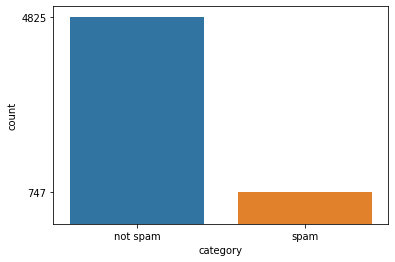

In [ ]:
import seaborn as sns
#how many spam and not spam and visualize it
sns.countplot(data=df,x='category')
f=df['category'].value_counts()
plt.yticks(f)
plt.show()


In [ ]:
#create object of WordCloud
wc=WordCloud(width=800,height=800,background_color='white',
            stopwords=STOPWORDS,min_font_size=10)
wc.generate(''.join(df[df['category']=='not spam']['Message']))


In [ ]:
#df[df['category']=='not spam']['Message']

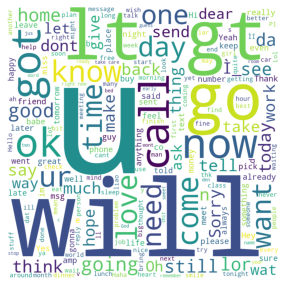

In [ ]:
#wordcloud is an image, so show image on o/p screen
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
#create object of WordCloud
wc=WordCloud(width=800,height=800,background_color='white',
            stopwords=STOPWORDS,min_font_size=10)
wc.generate(''.join(df[df['category']=='spam']['Message']))

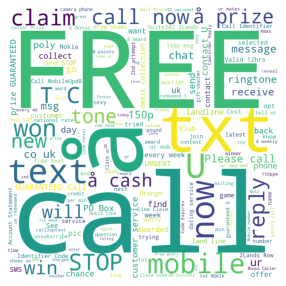

In [ ]:
#wordcloud is an image, so show image on o/p screen
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
#Prepocessing on text, here text is Message
#create user defined function
def clean_text(text):
  #first convert in lower case
  text=text.lower()
  #print(text)
  #next step,apply word_tokenize on given text
  tokens=word_tokenize(text)
  #next step : filtering only alphabets from given tokens, use
  #inbuilt function isalpha() means only accept alphabets 
  #and remove all numbers and all special charecter from given msg
  word_tokens=[w for w in tokens if w.isalpha()]
  #to remove stopwords from given msg
  #create an object of stopwords class
  stop=stopwords.words('english')
  clean_tokens=[w for w in word_tokens if w not in stop]
  #print(clean_tokens)
  #next apply lemmetization of clean_token list
  #create ovject of WordNetLemmatizer
  lemma=WordNetLemmatizer()
  lemma_tokens=[lemma.lemmatize(w) for w in clean_tokens]
  #return lemma_tokens (just for explaning)
  return ' '.join(lemma_tokens)


In [ ]:
#call in main
#testing function made by us clean_text()
#x=clean_text("I am Tehsin Bhati, and my id is wolf 12345@ gamil . com wolves foot feet happy happiest  ")
#print(x)
#print(set(x))

In [ ]:
#call funcation in main Apply works as map function (Python inbuilt function)
df['Message']=df['Message'].apply(clean_text) #Apply python inbuilt function


In [ ]:
df.head() #this will show cleaned Message

,category,Message
0,not spam,go jurong point crazy available bugis n great ...
1,not spam,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,not spam,u dun say early hor u c already say
4,not spam,nah think go usf life around though


In [ ]:
#select input and features and output from dataset
X=df['Message'] #input
Y=df['category'] #output

In [ ]:
Y.head()

0    not spam
1    not spam
2        spam
3    not spam
4    not spam
Name: category, dtype: object

In [ ]:
Y.dtypes #pandas support dtypes (s works here)

dtype('O')

In [ ]:
#apply labelencoder for output Y
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder class
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Y.dtype #numpy supports dtype

dtype('int64')

In [ ]:
#train test split : 70% 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [ ]:
X_train.head()

4393                     baaaaaaaabe wake miss crave need
216                           tired slept well past night
4471                        received mobile content enjoy
3889    double min txts orange tariff latest motorola ...
5030                              hey inconvenient si huh
Name: Message, dtype: object

In [ ]:
X_train.shape, X_test.shape

((3900,), (1672,))

In [ ]:
Y_train.shape, Y_test.shape

((3900,), (1672,))

In [ ]:
#Now once we have the clean text in hand ,the next thing that we would 
#like to do is converts the text into number/vector

#First , we are trying the first technique : countvectorizer() : 
#its converts any text to number

In [ ]:
#create an object of CountVectorizer class
cv=CountVectorizer() #stopwords phele hi hata chuke hai toh waps lagane ki zarurat nahi
#Here not passing stopwords='english' parameter why?
#because its already taking care of all the stopwords means 
#already remove all stopwords from msg


In [ ]:
#Apply fit_transform of count vectorizer class on X_train input
X_train_cv=cv.fit_transform(X_train)

In [ ]:
#Apply fit_transform of count vectorizer class on X_test input
X_test_cv=cv.transform(X_test)

In [ ]:
X_train_cv

<3900x5518 sparse matrix of type '<class 'numpy.int64'>'
	with 29662 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_train_cv.toarray(),columns=cv.get_feature_names())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(X_test_cv.toarray(),columns=cv.get_feature_names())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#to show only features (column)
cv.get_feature_names()

['aah',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abeg',
 'abel',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounting',
 'accumulation',
 'ache',
 'acid',
 'acnt',
 'aco',
 'across',
 'acted',
 'actin',
 'action',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'adore',
 'adoring',
 'adress',
 'adsense',
 'adult',
 'advance',
 'adventure',
 'advice',
 'advise',
 'advisor',
 'afew',
 'affair',
 'affection',
 'affectionate'

**DecisionTreeClassifier**

In [ ]:
# feed the data to Machine Learning algo
#we have classification problem, coz we have to predict msg is spam or not spam 
#we use classfication algo DecisionTreeClassifier
#call
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#object
dt=DecisionTreeClassifier()  #by default criterions='gini'

In [ ]:
#train the model with 70% data
dt.fit(X_train_cv,Y_train)

DecisionTreeClassifier()

In [ ]:
#test the model with 30% data
Y_pred=dt.predict(X_test_cv)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1454
           1       0.86      0.80      0.83       218

    accuracy                           0.96      1672
   macro avg       0.92      0.89      0.90      1672
weighted avg       0.96      0.96      0.96      1672

[[1426   28]
 [  43  175]]


In [ ]:
#precision false +ve of 0 is main ,    0= 0.97
#do puring technique on this 
#and give to other algo also


In [ ]:
#second technique to convert message into vector : TFID tech.
#term frequency -Inverse document frequency
#call TfidfVectorizer inbuilt class
#create object of TfidfVectorizer
tfidf=TfidfVectorizer()

In [ ]:
X_train_tf=tfidf.fit_transform(X_train)
X_test_tf=tfidf.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tf.toarray(),columns=tfidf.get_feature_names())

,aah,aaooooright,aathi,ab,abbey,abeg,abel,abi,ability,abiola,...,zoe,zogtorius,zoom,zouk,zyada,åð,åòharry,åòit,åômorrow,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#object
dt1=DecisionTreeClassifier()  #by default criterions='gini'

In [ ]:
#train the model with 70% data
dt1.fit(X_train_tf,Y_train)

DecisionTreeClassifier()

In [ ]:
#test the model with 30% data
Y_pred=dt1.predict(X_test_tf)

In [ ]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1454
           1       0.83      0.76      0.79       218

    accuracy                           0.95      1672
   macro avg       0.90      0.87      0.88      1672
weighted avg       0.95      0.95      0.95      1672

[[1419   35]
 [  52  166]]


In [ ]:
#precision false +ve of 0 is main ,    0= 0.97
#do puring technique on this 
#and give to other algo also


In [ ]:
#Train the model with neural network
#next goto neural network means deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
#use countvectorizer in NN
#compolsory to convert in neural network
X_train_cv1=X_train_cv.toarray()
X_test_cv1=X_test_cv.toarray()

In [ ]:
#create obj
model=Sequential()
model.add(Dense(units=5518,activation='relu',input_shape=(X_train_cv1.shape[1],))) #first hidden layer
model.add(Dense(units=5518,activation='relu',))
#to add second layer
model.add(Dense(units=1,activation='sigmoid',))
#to add output layer using sigmoid 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5518)              30453842  
                                                                 
 dense_1 (Dense)             (None, 5518)              30453842  
                                                                 
 dense_2 (Dense)             (None, 1)                 5519      
                                                                 
Total params: 60,913,203
Trainable params: 60,913,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#create ca procedure of call back
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
callback=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)


In [ ]:
#train the model
trained_model=model.fit(X_train_cv1,Y_train,batch_size=100,callbacks=callback,epochs=2000,validation_data=(X_test_cv1,Y_test))

Epoch 1/2000
39/39 [==============================] - 48s 1s/step - loss: 0.2011 - accuracy: 0.9341 - val_loss: 0.0873 - val_accuracy: 0.9785
Epoch 2/2000
39/39 [==============================] - 33s 858ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.1031 - val_accuracy: 0.9809
Epoch 3/2000
39/39 [==============================] - 34s 879ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1376 - val_accuracy: 0.9833
Epoch 4/2000
39/39 [==============================] - 35s 898ms/step - loss: 4.8250e-04 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 0.9839
Epoch 5/2000
39/39 [==============================] - 34s 862ms/step - loss: 1.7750e-04 - accuracy: 1.0000 - val_loss: 0.1555 - val_accuracy: 0.9839
Epoch 6/2000
39/39 [==============================] - 33s 859ms/step - loss: 1.0437e-04 - accuracy: 1.0000 - val_loss: 0.1600 - val_accuracy: 0.9821
Epoch 7/2000
39/39 [==============================] - 33s 860ms/step - loss: 7.0977e-05 - accuracy: 1.0000 - val_loss: 0.

In [ ]:
model.evaluate(X_train_cv1,Y_train)

122/122 [==============================] - 14s 111ms/step - loss: 4.8584e-06 - accuracy: 1.0000


[4.858371994487243e-06, 1.0]

In [ ]:
model.evaluate(X_test_cv1,Y_test)

53/53 [==============================] - 6s 110ms/step - loss: 0.2003 - accuracy: 0.9821


[0.20027387142181396, 0.9820573925971985]

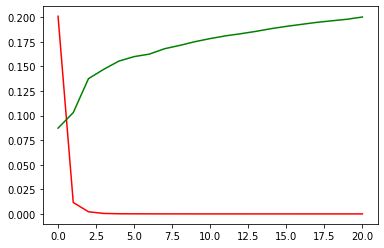

In [ ]:
plt.plot(trained_model.history['loss'],label='Training loss',color='red')
plt.plot(trained_model.history['val_loss'],label='Testing loss',color='green')

In [ ]:
#testing the model : use inbuilt function predict()
Y_pred=model.predict(X_test_cv1)
Y_pred=np.where(Y_pred>=0.5,1,0)
#print score
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.97      0.89      0.93       218

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

[[1449    5]
 [  25  193]]
